In [1]:
import numpy as np
import pandas as pd
import operator
import pickle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import linear_model

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE
import warnings
warnings.filterwarnings(action='once')

import xgboost
from xgboost import XGBClassifier
#from sklearn.tree import export_graphviz
#import graphviz
#from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import *
import warnings
warnings.filterwarnings(action='once')
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from itertools import cycle

In [2]:
X = pd.read_pickle('../../../Data/Opioids/Model_Data/SMOTE/X.pickle')
y = np.load('../../../Data/Opioids/Model_Data/SMOTE/y.pickle', allow_pickle=True)
X_resampled = np.load('../../../Data/Opioids/Model_Data/SMOTE/X_resampled.pickle', allow_pickle=True)
y_resampled = np.load('../../../Data/Opioids/Model_Data/SMOTE/y_resampled.pickle', allow_pickle=True)
X_res_vis = np.load('../../../Data/Opioids/Model_Data/SMOTE/X_res_vis.pickle', allow_pickle=True)
X_vis = np.load('../../../Data/Opioids/Model_Data/SMOTE/X_vis.pickle', allow_pickle=True)
X_train = pd.read_pickle('../../../Data/Opioids/Model_Data/SMOTE/X_train.pickle')
Y_train = pd.read_pickle('../../../Data/Opioids/Model_Data/SMOTE/Y_train.pickle')
X_test = pd.read_pickle('../../../Data/Opioids/Model_Data/SMOTE/X_test.pickle')
Y_test = pd.read_pickle('../../../Data/Opioids/Model_Data/SMOTE/Y_test.pickle')

D:\Anaconda3\envs\emitter\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### After SMOTE and PCA

In [3]:
len(X_train)

D:\Anaconda3\envs\emitter\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31950

In [4]:
validation_range = int(0.8*len(X_train))
X_val = X_train.iloc[range(validation_range, len(X_train))]
Y_val = Y_train.iloc[range(validation_range, len(Y_train))]
len(Y_val)

6390

In [5]:
X_train = X_train.iloc[range(0, validation_range)]
Y_train = Y_train.iloc[range(0, validation_range)]
len(X_train)

25560

In [6]:
model = XGBClassifier(eval_metric='logloss')

param_grid = {"max_depth": [3, 5, 8, 10], 
             "learning_rate": [0.03, 0.1], 
             "n_estimators": [50, 100, 150, 200], 
             "objective": ['binary:logistic']}

clf = GridSearchCV(model, param_grid=param_grid)

In [7]:
warnings.filterwarnings('ignore')
clf.fit(X_val, Y_val)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
             

In [8]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'objective': 'binary:logistic'}

In [9]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'objective': 'binary:logistic'}

In [10]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic',eval_metric='logloss')
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [30]:
y_pred = model.predict(X_test)
model.score(X_test, Y_test)

0.9435403104656985

In [12]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      3990
         1.0       0.93      0.96      0.94      3998

    accuracy                           0.94      7988
   macro avg       0.94      0.94      0.94      7988
weighted avg       0.94      0.94      0.94      7988



In [13]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, y_pred).ravel()
#print(tn, fp, fn, tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
npv = tn/(tn+fn)
f1_score = (2*precision*recall)/(precision + recall)
print("Precision (PPV): ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)
print("NPV: ", npv)
print("Accuracy: ", (metrics.accuracy_score(Y_test, y_pred)))

Precision (PPV):  0.9291071860633922
Recall:  0.9604802401200601
F1 score:  0.9445332677407453
NPV:  0.9590142671854734
Accuracy:  0.9435403104656985


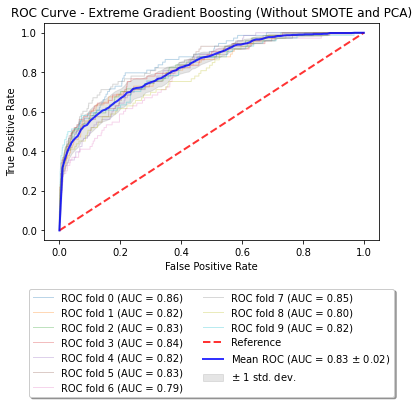

In [39]:
X_cv = X.to_numpy()
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic', eval_metric='logloss')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X_cv[train], y[train]).predict_proba(X_cv[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Reference', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)


plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting (Without SMOTE and PCA)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.savefig('xgboost_roc_1')
plt.show()

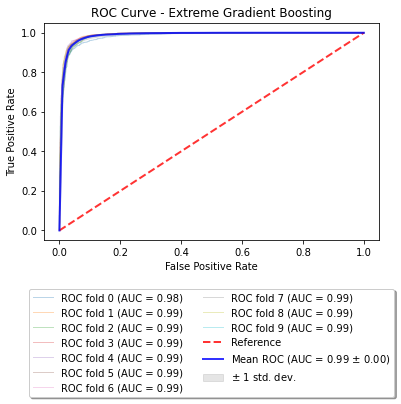

In [40]:
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic', eval_metric='logloss')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X_res_vis, y_resampled):
    probas_ = classifier.fit(X_res_vis[train], y_resampled[train]).predict_proba(X_res_vis[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Reference', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extreme Gradient Boosting')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.savefig('xgboost_roc_2')
plt.show()

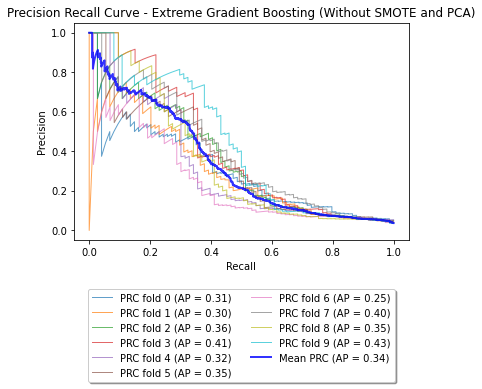

In [41]:
X_cv = X.to_numpy()
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic', eval_metric='logloss')

precision_scores = []
aucs = []
mean_recall = np.linspace(0, 1, 100)

y_test_cv = []
y_proba_cv = []

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X_cv[train], y[train]).predict_proba(X_cv[test])
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y[test], probas_[:, 1])
    precision_scores.append(interp(mean_recall, recall, precision))
    precision_scores[-1][0] = 0.0
    pr_auc = metrics.average_precision_score(y[test], probas_[:, 1])
    aucs.append(pr_auc)
    plt.plot(recall, precision, lw=1, alpha=0.7,
             label='PRC fold %d (AP = %0.2f)' % (i, pr_auc))
    y_test_cv.append(y_resampled[test])
    y_proba_cv.append(probas_[:, 1])

    i += 1

y_test_cv = np.concatenate(y_test_cv)
y_proba_cv = np.concatenate(y_proba_cv)
precision, recall, _ = metrics.precision_recall_curve(y_test_cv, y_proba_cv)
pr_auc = metrics.average_precision_score(y_test_cv, y_proba_cv)

plt.plot(recall, precision, color='b',
         label=r'Mean PRC (AP = %0.2f)' % (pr_auc),
         lw=2, alpha=.8)



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Extreme Gradient Boosting (Without SMOTE and PCA)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.savefig('xgboost_prc_1')
plt.show()

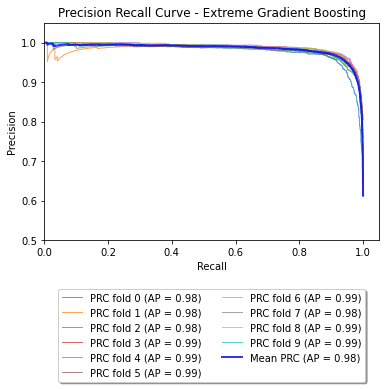

In [42]:
cv = StratifiedKFold(n_splits=10)
classifier = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 200, objective = 'binary:logistic', eval_metric='logloss')


precision_scores = []
aucs = []
mean_recall = np.linspace(0, 1, 100)

y_test_cv = []
y_proba_cv = []

i = 0
for train, test in cv.split(X_res_vis, y_resampled):

    probas_ = classifier.fit(X_res_vis[train], y_resampled[train]).predict_proba(X_res_vis[test])
    # Compute ROC curve and area the curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_resampled[test], probas_[:, 1])
    precision_scores.append(interp(mean_recall, recall, precision))
    precision_scores[-1][0] = 0.0
    pr_auc = metrics.average_precision_score(y_resampled[test], probas_[:, 1])
    aucs.append(pr_auc)
    plt.plot(recall, precision, lw=1, alpha=0.7,
             label='PRC fold %d (AP = %0.2f)' % (i, pr_auc))
    y_test_cv.append(y_resampled[test])
    y_proba_cv.append(probas_[:, 1])

    i += 1

y_test_cv = np.concatenate(y_test_cv)
y_proba_cv = np.concatenate(y_proba_cv)
precision, recall, _ = metrics.precision_recall_curve(y_test_cv, y_proba_cv)
pr_auc = metrics.average_precision_score(y_test_cv, y_proba_cv)
plt.plot(recall, precision, color='b',
         label=r'Mean PRC (AP = %0.2f)' % (pr_auc),
         lw=2, alpha=.8)

std_precision = np.std(precision_scores, axis=0)
precision_scores_upper = np.minimum(mean_precision + std_precision, 1)
precision_scores_lower = np.maximum(mean_precision - std_precision, 0)

plt.xlim([0, 1.05])
plt.ylim([0.5, 1.05])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Extreme Gradient Boosting')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),  shadow=True, ncol=2)
plt.savefig('xgboost_prc_2')
plt.show()